In [1]:
using DelimitedFiles, Plots, Statistics

using CurveFit, LaTeXStrings

Plots.default(
    grid = true,
    size = (400,400),
    fontfamily="serif-roman", 
    labelfontsize=15,
    titlefontsize =12,
    xguidefontsize=15,
    yguidefontsize=15,
    xtickfontsize=12,
    ytickfontsize=12,
    markerstrokewidth = 1,        # border around dots
#    markersize = 3
)

In [2]:
# read 1 gamma value, all runs

#path = "tmp_stab/res_epid_stab/"
#nam="fileres_epid_stab"
path = "tmp_stab/res_epid_1graph_stab/"
nam="fileres_epid_1graph_stab"

#extension ="_SIG00.000001_run" 
extension ="_run"  

T=8
LAM=1.0
GAM=0.006
N=500000
iter=500
halfiter=Int64(iter/2)+2
numruns = 1:10

1:10

TIT = "T=8, λ=1.0, γ=0.006, N=500000"


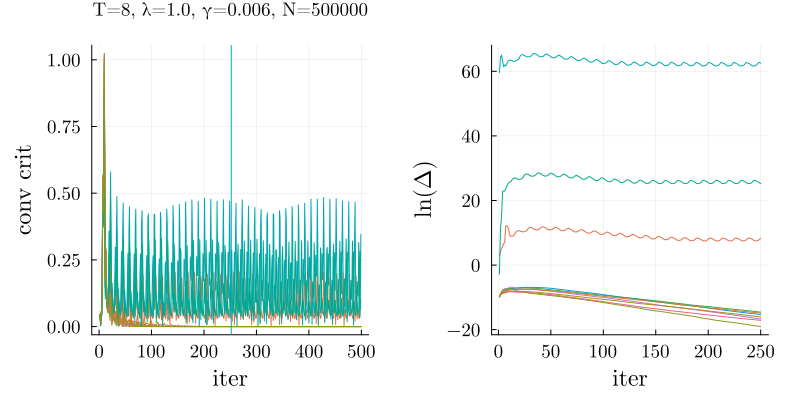

In [3]:
TIT = "T="*string(T)*", λ="*string(LAM)*", γ="*string(GAM)*", N="*string(N)
@show TIT
foldergam="gam"*string(GAM)*"/"
nameparams = "_T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)
pconv=plot(xaxis="iter", yaxis="conv crit", title=TIT);
pd1 = plot(xaxis="iter", yaxis="ln(Δ)");

for nrun in numruns
    namefile = path*foldergam*nam*nameparams*extension*string(nrun)
    file = readdlm(namefile);
    res = file[4:end,1:3]
    iter_full=1:sum(typeof.(res[:,2]).!=SubString{String})
    iter_err = findall([(!isinf(res[j,2])&&!isnan(res[j,2])) for j in iter_full])
    iter_Δ = findall([(!isinf(res[j,3])&&!isnan(res[j,3])) for j in iter_full])
    iter_Δ = findall([res[j,3].>0.0 for j in iter_Δ])
    log_Δ = log.(res[iter_Δ,3])
    plot!(pconv,res[iter_full,2], label="")
    plot!(pd1, log_Δ, label="")
end
vline!(pconv, [halfiter], label="")
pγ= plot(pconv, pd1, size=(800,400), layout=(1,2), margin=6*Plots.mm)

sfitΔ = 0.9656262254542965


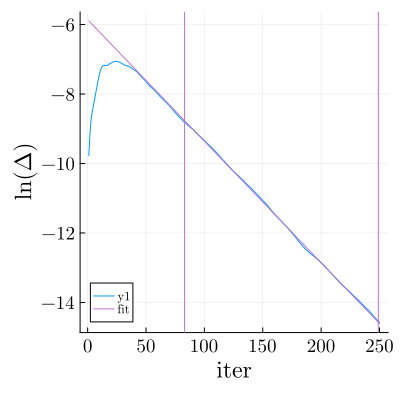

In [4]:
nrun = 3
namefile = path*foldergam*nam*nameparams*extension*string(nrun)
file = readdlm(namefile);
res = file[4:end,1:3]
iter_full=1:sum(typeof.(res[:,2]).!=SubString{String})
iter_err = findall([(!isinf(res[j,2])&&!isnan(res[j,2])) for j in iter_full])
iter_Δ = findall([(!isinf(res[j,3])&&!isnan(res[j,3])) for j in iter_full])
iter_Δ = findall([res[j,3].>0.0 for j in iter_Δ])
log_Δ = log.(res[iter_Δ,3])

pΔ = plot(xaxis="iter", yaxis="ln(Δ)");
plot!(pΔ, log_Δ)
frac_cut = 3
lsta = Int64(round(length(iter_Δ)/frac_cut))
lend = length(iter_Δ)-1#-lsta
log_Δ_cut = log_Δ[lsta:lend]
(a,b)=linear_fit(lsta:lend, log_Δ_cut)
sfitΔ = exp(b)
@show sfitΔ
lmid=Int64(round((lsta+lend)/2))
diff_fit = b*lmid - log_Δ[lmid]  
vline!(pΔ, [lsta], color=4, label="")
vline!(pΔ, [lend], color=4, label="")    
plot!(pΔ, b.*(1:length(iter_Δ)).-diff_fit, label="fit")

plot(pΔ)

In [12]:
# Set params: popdyn - right

path = "tmp_stab/res_epid_stab/"
nam="fileres_epid_stab"
extension ="_SIG00.0001_run" 
#extension ="_run"  

ext_plot_title = "popdyn_right"

T=8
LAM=1.0
N=50000
iter=500
halfiter=Int64(iter/2)+2
runs_range=1:10

γ_range = [0.014, 0.01475, 0.015, 0.01525, 0.0155, 0.01575, 0.016, 
    0.01625, 0.0165, 0.017, 0.0175, 0.018] 
γ_range = γ_range[2:end]

11-element Vector{Float64}:
 0.01475
 0.015
 0.01525
 0.0155
 0.01575
 0.016
 0.01625
 0.0165
 0.017
 0.0175
 0.018

In [9]:
# Set params: 1graph - right

path = "tmp_stab/res_epid_1graph_stab/"
nam="fileres_epid_1graph_stab"
extension = "_SIG00.000001_run"
#extension ="_run"  

ext_plot_title = "graph_right"

T=8
LAM=1.0
N=500000
iter=2000
halfiter=Int64(iter/2)+2
runs_range=1:10

#γ_range = [0.00975, 0.01, 0.01025, 0.0105, 0.01075, 0.011, 0.0115]
#γ_range = γ_range[3:end]
γ_range = [0.01025]


1-element Vector{Float64}:
 0.01025

In [7]:
# Set params: popdyn - left

path = "tmp_stab/res_epid_stab/"
nam="fileres_epid_stab"
extension = "_SIG00.000001_run"
#extension ="_run"  

ext_plot_title = "popdyn_left"

T=8
LAM=1.0
N= 500000
iter=500
halfiter=Int64(iter/2)+2
runs_range=1:10

γ_range = [0.00525, 0.005275, 0.0053, 0.005325, 0.00535, 0.005375, 0.0054, 0.005425, 0.00545]
γ_range = γ_range[1:end-1]


8-element Vector{Float64}:
 0.00525
 0.005275
 0.0053
 0.005325
 0.00535
 0.005375
 0.0054
 0.005425

In [8]:
# Set params: 1graph - left

path = "tmp_stab/res_epid_1graph_stab/"
nam="fileres_epid_1graph_stab"
#extension = "_SIG00.000001_run"
extension ="_run"  

ext_plot_title = "graph_left"

T=8
LAM=1.0
N=500000
iter=500
halfiter=Int64(iter/2)+2
runs_range=1:10

γ_range = [0.00525, 0.0054, 0.0055, 0.0056, 0.0057, 0.00575,
    0.0058, 0.0059, 0.006, 0.0061] 


10-element Vector{Float64}:
 0.00525
 0.0054
 0.0055
 0.0056
 0.0057
 0.00575
 0.0058
 0.0059
 0.006
 0.0061

In [13]:
# Loop on gamma

gam_res = zeros(length(γ_range), length(runs_range));
std_F_res = zeros(length(γ_range), length(runs_range));
diffmean_F_res = zeros(length(γ_range), length(runs_range));
for iγ in 1:length(γ_range)
    GAM=γ_range[iγ]
        
    for irun in 1:length(runs_range)
        run=runs_range[irun]
        foldergam="gam"*string(GAM)*"/"
        nameparams = "_T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)
        namefile = path*foldergam*nam*nameparams*extension*string(run)

        file = readdlm(namefile);
        res = file[4:end,1:3]
        iter_full=1:sum(typeof.(res[:,2]).!=SubString{String})
        iter_Δ = findall([(!isinf(res[j,3])&&!isnan(res[j,3])) for j in iter_full])
        iter_Δ = findall([res[j,3].>0.0 for j in iter_Δ])

        lend_err = iter_full[end]
        if lend_err > 400
            diffmean_F = mean(res[lend_err-400:lend_err-200,2])-mean(res[lend_err-100:lend_err,2])
            std_F = std(res[end-400:lend_err,2])
        else
            diffmean_F = NaN
            std_F = NaN
        end
        
        frac_cut = 3
        if length(iter_Δ)>0 && res[end,3]<1
            frac_cut = 3
            lsta = Int64(round(length(iter_Δ)/frac_cut))
            lend = length(iter_Δ)-1
            log_Δ = log.(res[iter_Δ,3])
            log_Δ_cut = log_Δ[lsta:lend]
            (a,b)=linear_fit(lsta:lend, log_Δ_cut)
            sfitΔ = exp(b)
        else
            sfitΔ=NaN
        end
        gam_res[iγ,irun]=sfitΔ
        std_F_res[iγ,irun]=std_F
        diffmean_F_res[iγ,irun]=diffmean_F
    end
end

mean_gam = zeros(length(γ_range))
std_gam = zeros(length(γ_range))

mean_errF = zeros(length(γ_range))
std_errF = zeros(length(γ_range))

mean_diffmean_F = zeros(length(γ_range))
std_diffmean_F = zeros(length(γ_range))

for iγ in 1:length(γ_range)
    indicesconv=.!isnan.(gam_res[iγ,:])
    
    println("γ=", γ_range[iγ], "\t nc=", sum(indicesconv))
    
    mean_gam[iγ] = mean(gam_res[iγ,indicesconv])
    std_gam[iγ] = std(gam_res[iγ,indicesconv])

    mean_errF[iγ] = mean(std_F_res[iγ,indicesconv])
    std_errF[iγ] = std(std_F_res[iγ,indicesconv])

    mean_diffmean_F[iγ] = mean(diffmean_F_res[iγ,indicesconv])
    std_diffmean_F[iγ] = std(diffmean_F_res[iγ,indicesconv])
   
end

γ=0.01475	 nc=10
γ=0.015	 nc=10
γ=0.01525	 nc=10
γ=0.0155	 nc=10
γ=0.01575	 nc=10
γ=0.016	 nc=10
γ=0.01625	 nc=10
γ=0.0165	 nc=10
γ=0.017	 nc=10
γ=0.0175	 nc=10
γ=0.018	 nc=10


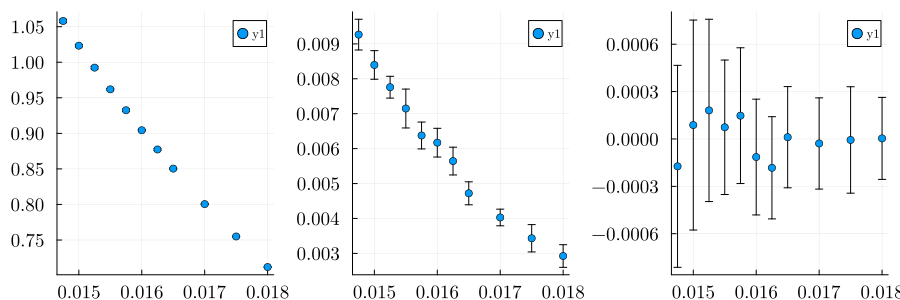

In [14]:
# Plot results

p1 = scatter(γ_range, mean_gam, err=std_gam)
p2 = scatter(γ_range, mean_errF, err=std_errF)
p3 = scatter(γ_range, mean_diffmean_F, err=std_diffmean_F)
plot(p1, p2, p3, layout=(1,3), size=(900, 300))


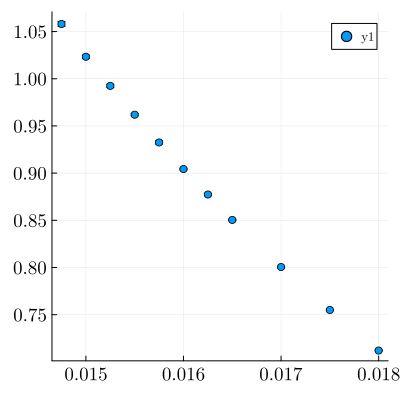

In [15]:
p1

In [17]:
# Fit:

# Fit: popdyn - right
pts_fit= 1:length(γ_range)

# Fit: popdyn - left
#pts_fit= 1:length(γ_range)

# Fit: 1graph - right
#pts_fit= 1:length(γ_range)

# Fit: 1graph - left
#pts_fit= 1:length(γ_range)

1:11

In [19]:
fit_range_plot= γ_range[pts_fit]
(a0,a1,a2)=poly_fit(γ_range[pts_fit], mean_gam[pts_fit], 2)
@show a0,a1,a2
discrim=a1^2-4*a2*(a0-1)
solm, solp = (-a1-sqrt(discrim))/(2*a2), (-a1+sqrt(discrim))/(2*a2)


(a0, a1, a2) = (4.749610604918585, -368.7177414506635, 8024.119853012828)


(0.015191938959583182, 0.030759236771200613)

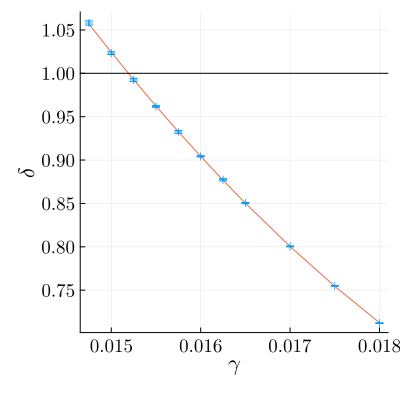

In [20]:
pγ = plot(xlabel=L"\gamma", ylabel=L"\delta")
plot!(pγ, fit_range_plot, a2.*fit_range_plot.*fit_range_plot .+ a1.*fit_range_plot .+ a0, 
    label="", linewidth=1, color=2)
scatter!(γ_range, mean_gam, err=std_gam, 
    label="", markershape=:cross, markerstrokecolor=:1, markerstrokewidth=1, color=1)
hline!(pγ, [1], label="", color="black")


In [ ]:
savefig(pγ, "stav_crit_"*ext_plot_title*"_T"*string(T)*"_λ"*string(LAM)*"_N"*string(N)*".pdf")

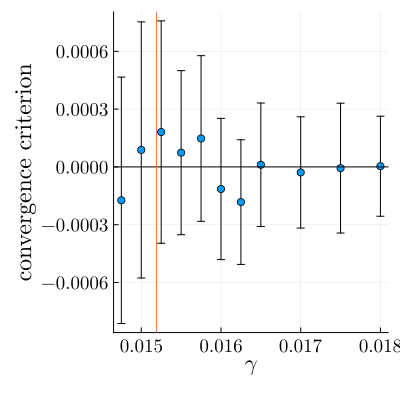

In [21]:
pconv = plot(xlabel=L"γ", ylabel="convergence criterion")
scatter!(pconv, γ_range, mean_diffmean_F, err=std_diffmean_F, label="")
hline!(pconv, [0], label="", color="black")
vline!(pconv, [solm], label="", color=2)

In [ ]:
savefig(pconv, "conv_crit_"*ext_plot_title*"_T"*string(T)*"_λ"*string(LAM)*"_N"*string(N)*".pdf")

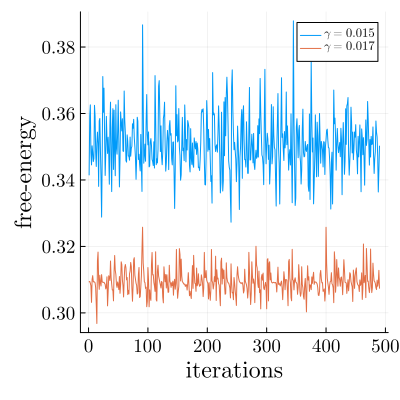

In [22]:
# read single run free-energy

path = "tmp_stab/res_epid_stab/"
nam="fileres_epid_stab"
#path = "tmp_stab/res_epid_1graph_stab/"
#nam="fileres_epid_1graph_stab"

extension ="_SIG00.0001_run" 
#extension ="_run"  

T=8
LAM=1.0
N=50000
iter=500

pF=plot(xaxis="iterations", yaxis="free-energy");

nrun = 1
for GAM in [0.015, 0.017]
    foldergam="gam"*string(GAM)*"/"
    nameparams = "_T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)
    namefile = path*foldergam*nam*nameparams*extension*string(nrun)
    file = readdlm(namefile);
    res = file[4:end,1:3]
    iter_full=10:sum(typeof.(res[:,2]).!=SubString{String})
    plot!(pF,res[iter_full,2], label=L"γ="*string(GAM) )
end
pF

In [ ]:
savefig(pF, "free_energy_fluctuations_T"*string(T)*"_λ"*string(LAM)*"_N"*string(N)*".pdf")

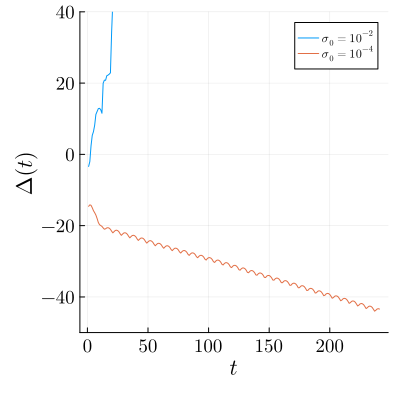

In [23]:
# read single run stability parameter

path = "tmp_stab/res_epid_stab/"
nam="fileres_epid_stab"
#path = "tmp_stab/res_epid_1graph_stab/"
#nam="fileres_epid_1graph_stab"


T=8
LAM=1.0
GAM=0.016
iter=500
N= 50000

exts = ["_run", "_SIG00.0001_run"] 
labels = [L"\sigma_0=10^{-2}", L"\sigma_0=10^{-4}"]

pΔ=plot(xaxis=L"t", yaxis=L"\Delta(t)", ylims=(-50,40));

nrun = 1
for i in 1:2
    extension = exts[i]
    lab = labels[i]
    foldergam="gam"*string(GAM)*"/"
    nameparams = "_T"*string(T)*"_LAM"*string(LAM)*"_GAM"*string(GAM)*"_N"*string(N)*"_iter"*string(iter)
    namefile = path*foldergam*nam*nameparams*extension*string(nrun)
    file = readdlm(namefile);
    res = file[4:end,1:3]
    iter_full=10:sum(typeof.(res[:,2]).!=SubString{String})
    iter_Δ = findall([(!isinf(res[j,3])&&!isnan(res[j,3])) for j in iter_full])
    iter_Δ = findall([res[j,3].>0.0 for j in iter_Δ])
    log_Δ = log.(res[iter_Δ,3])
    plot!(pΔ, log_Δ, label=lab)
end
pΔ


In [ ]:


savefig(pΔ, "ΔversusIter_T"*string(T)*"_λ"*string(LAM)*"_γ"*string(GAM)*"_N"*string(N)*".pdf")

